In [14]:
!python -m pintFoam.clean c1

In [16]:
from pathlib import Path
from pintFoam import Vector, BaseCase
import numpy as np
import pandas as pd

times = np.linspace(0.0, 350.0, 11)
intervals = list(zip(times[:-1], times[1:]))

baseCase1 = BaseCase(Path("c1_serial"), "baseCase")
snaps1 = [Vector(baseCase1, "baseCase", str(int(t))) for t in times[1:]]

baseCase2 = BaseCase(Path("c1"), "baseCase")


def diff(x, y):
    with x.mmap_data("p") as x_p, y.mmap_data("p") as y_p:
        d = np.abs(x_p - y_p)
    return {"min": d.min(), "max": d.max(), "mean": d.mean(), "std": d.std()}

def read_stats():
    for n in range(1, 5):
        cases = [Vector(baseCase2, f"{n}-{int(t_0):03}-{int(t_1):03}-fine", str(int(t_1))) for (t_0, t_1) in intervals]
        yield from (diff(ref, pr) | {"n": n, "t": t} for t, ref, pr in zip(times[1:], snaps1, cases))

In [17]:
stats = pd.DataFrame(read_stats())

In [18]:
from plotnine import ggplot, geom_point, aes

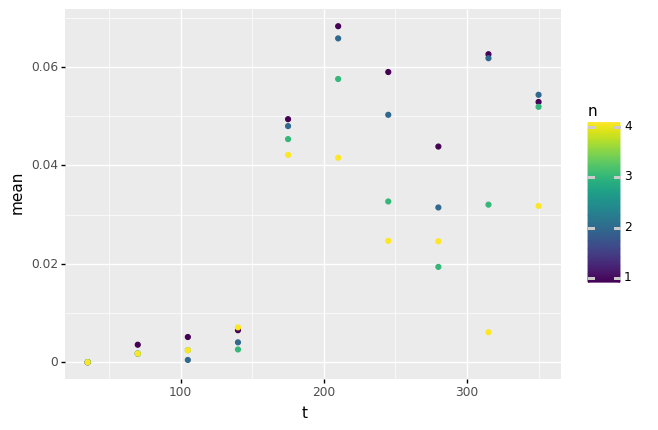

<ggplot: (8741632668901)>

In [19]:
ggplot(stats, aes(x="t", y="mean", color="n")) + geom_point()